In [123]:
#@title 1. Install third-party software

from ipywidgets import interact
import sys
import copy

from Signal.sequence_gen import sequence_generator
from utils.dataset import visualize_dataset

In [115]:
#@title 2. Set up the parameters of simulted spectra generation

global spectrum_num_glob, width_glob, label_ci_glob, height_limit_glob
global peak_num_max_glob, peak_num_min_glob, stn_min_glob, stn_max_glob
global settings_dict

settings_dict: dict = {
    "spectrum_num": 2,
    "width": 1000,
    "label_ci": 1,
    "baseline_height_range": [10, 20],
    "std_range": [4, 8],
    "sprate_range": [1, 3],
    "fp_range": [1e-4, 1e-3],
    "fs_range": [1e-2, 1e-1],
    "gpass_range": [-1, -0.1],
    "gstop_range": [-30, -10],
    "peak_num_range": [0, 3],
    "pos_range": [0.001, 0.999],
    "amp_range": [10, 100],
    "sigma_range": [10, 20],
    "stn_range": [1, 2],
    "dataset_id": 10,
    "seed": "time",
    "dataset_dir": "../data/dataset/",
    "height_limit": 1000,
    "reset_dataset": True
}

def setting_params_interact(spectrum_num, width, label_ci, height_limit, peak_num_min,peak_num_max, stn_min, stn_max):
    global spectrum_num_glob, width_glob, label_ci_glob, height_limit_glob, peak_num_max_glob, peak_num_min_glob, stn_min_glob, stn_max_glob
    spectrum_num_glob = int(spectrum_num)
    width_glob = int(width)
    label_ci_glob = int(label_ci)
    height_limit_glob = int(height_limit)
    peak_num_min_glob = int(peak_num_min)
    peak_num_max_glob = int(peak_num_max)
    stn_min_glob = int(stn_min)
    stn_max_glob = int(stn_max)
    return "OK"


interact(setting_params_interact, spectrum_num="2", width="1000", label_ci="1", height_limit="1000", peak_num_min="2", peak_num_max="4", stn_min="1", stn_max="2");
settings_dict = settings_dict.copy()

interactive(children=(Text(value='2', description='spectrum_num'), Text(value='1000', description='width'), Te…

In [120]:
#@title 3. Generate simluated spectra

settings_dict["spectrum_num"] = spectrum_num_glob
settings_dict["width"] = width_glob
settings_dict["label_ci"] = label_ci_glob
settings_dict["height_limit"] = height_limit_glob
settings_dict["stn_range"] = [stn_min_glob, stn_max_glob]
settings_dict["peak_num_range"] = [peak_num_min_glob, peak_num_max_glob]

# print(settings_dict)

log_conf_path = "config/log_config.json"

dataset_dir, n_peaks = sequence_generator(settings_dict, "BTW", log_conf_path)

100%|██████████| 4/4 [00:00<00:00, 153.84it/s]


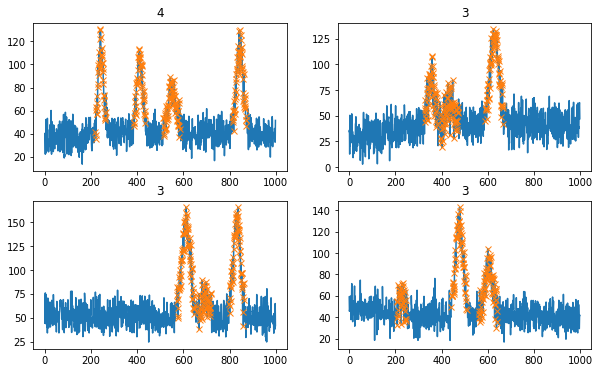

In [119]:
#@title 4. Visualize the generated spectra
 
visualize_dataset(dataset_dir, 2, 2, num = 4, true_peak_nums=n_peaks)